<a href="https://colab.research.google.com/github/ernestopalacios/07MBID/blob/main/AG2_ErnestoPalacios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>PRÁCTICA 2: APRENDIZAJE SUPERVISADO (DengAI)<center>

**Nombre y apellidos:** Ernesto Palacios Merino

**Usuario VIU:** epalaciosm@student.universidadviu.com

---
# Resumen
---

<font color="green">*\[\[Describir qué se va a hacer en esta práctica, mencionar las diferentes fases en las que se ha dividido la experimentación, así como las técnicas que se van a explicar en las siguientes secciones. Resumir también, muy brevemente, los principales resultados obtenidos.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Será necesario registrarse en la competición de DengAI de DrivenData para poder descargar el dataset: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/ \]\]*</font>

---
# Inicialización
---

In [83]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time

# Semilla aleatoria arbitraria y constante
seed = 42

# Dependencias propias
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

    return df

def download_predictions(test, pred_total_cases):
  file_name = "practica2_pred_" + time.strftime("%Y") + time.strftime("%m") + time.strftime("%d") + time.strftime("%H") + time.strftime("%M") + time.strftime("%S") + ".csv"
  predictions = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': pred_total_cases})
  with open(file_name, 'w') as f:
    predictions.to_csv(f, index = False)
  files.download(file_name)
  print("Downloaded " + file_name)

In [5]:
# Subir el conjunto de entrenamiento sin variable objetivo (dengue_features_train.csv)
train_feat = upload_files()
print(train_feat.shape)
train_feat.head()

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes
(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
# Subir la variable objetivo total_cases del conjunto de entrenamiento (dengue_labels_train.csv)
train_labels = upload_files()

# Unificar el conjunto de entrenamiento (características + variable objetivo)
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])
print(train.shape)
train.head()

Saving dengue_labels_train.csv to dengue_labels_train.csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes
(1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [7]:
# Subir el conjunto de test sin variable objetivo (dengue_features_test.csv)
test = upload_files()
print(test.shape)
test.head()

Saving dengue_features_test.csv to dengue_features_test.csv
User uploaded file "dengue_features_test.csv" with length 82465 bytes
(416, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


---
# Reexploración
---

## 1. Dividir el dataset por ciudades

En la primera parte determinamos que ambas ciudades tienen características diferentes.

Para nuestro análisis separaremos los datos para cada ciudad y ejecutaremos los mismos pasos en cada dataset,

<Axes: xlabel='city'>

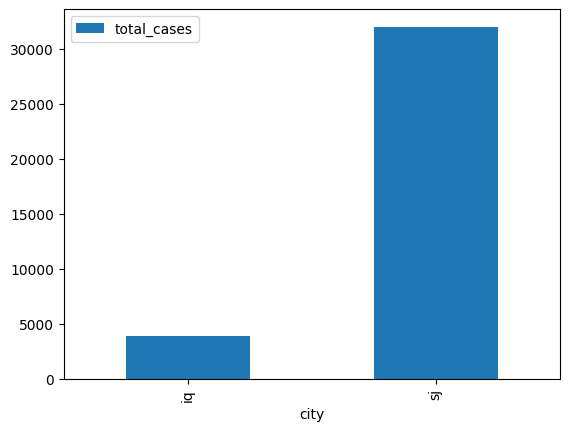

In [85]:
# Divido el dataset para cada ciudad

sj_df = train[train['city'] == 'sj']
iq_df = train[train['city'] == 'iq']

# Para tener una idea general vamos a visualizar los casos por ciudades
train[['city', 'total_cases']].groupby('city').sum().plot.bar()

```
Nuestra variable objetivo contiene muchos más casos para
San Juan en comparación con Iquitos, en parte se puede explicar
por la cantidad de habitantes. Sin embargo esta relación
se debe principalmente a que existen mas datos para San Juan
```

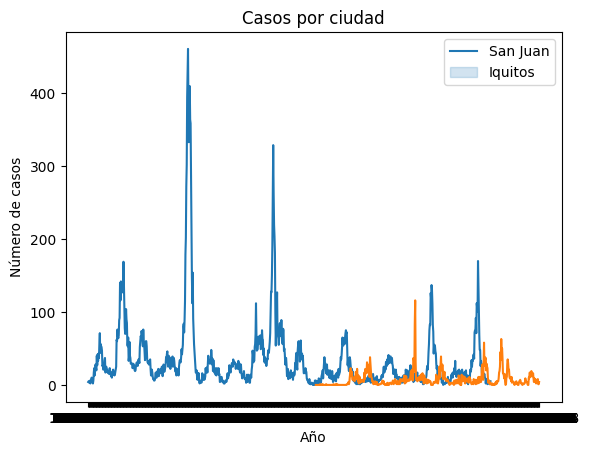

In [86]:
# Grafica de la evolución de casos para cada ciudad.
ax = plt.subplot()
sns.lineplot(data = sj_df, x = 'week_start_date', y = 'total_cases', ax = ax)
sns.lineplot(data = iq_df, x = 'week_start_date', y = 'total_cases', ax = ax)
ax.set_title('Casos por ciudad')
ax.set_ylabel('Número de casos')
ax.set_xlabel('Año')
ax.legend(['San Juan', 'Iquitos'])

```
Aqui visualizamos que no solo es la cantidad de datos sino también
hay una mayor rendencia de casos en San Juan.

Es posible que exista temporalidad para los datos de San Juan.
```

### Tratamiento de datos faltantes

Al igual que en la primera actividad, los datos faltantes son interpolados linealmente consideranto las observaciones anteriores y futuras, visualizaremos este cambio con la variable que más datos perdidos tiene: `ndvi_ne`

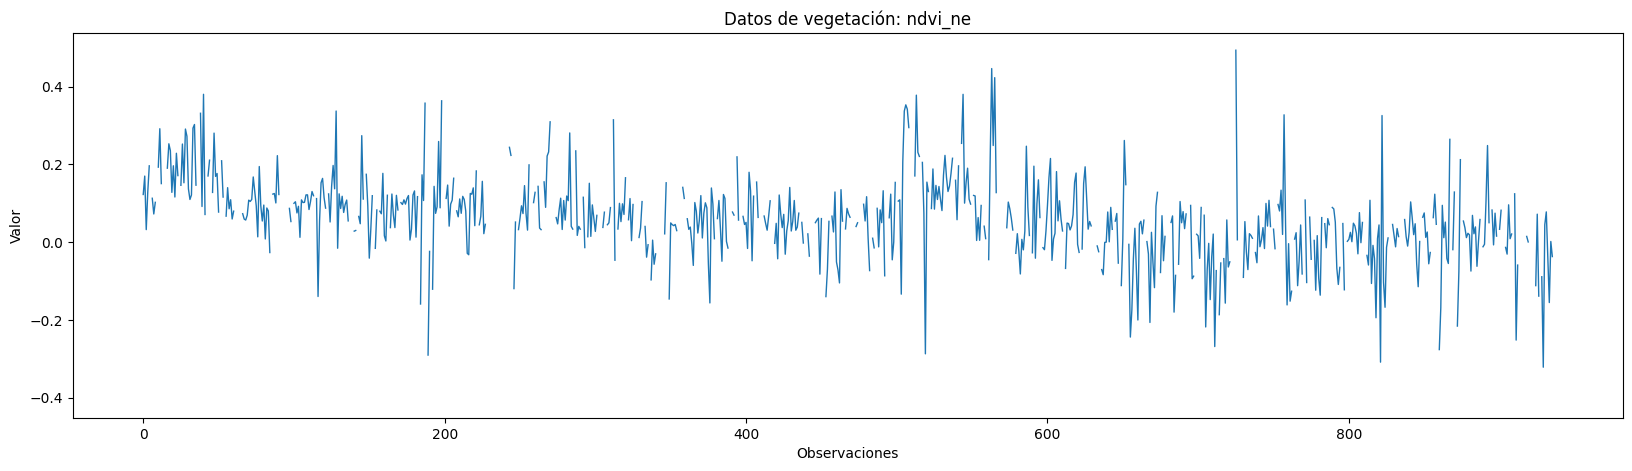

In [87]:
# Exploramos los datos faltantes en la variable que más faltantes tiene:

plt.figure(figsize = (20, 5))
(sj_df
     .ndvi_ne
     .plot
     .line(lw = 1))

plt.title('Datos de vegetación: ndvi_ne')
plt.xlabel('Observaciones')
plt.ylabel('Valor')
plt.show()

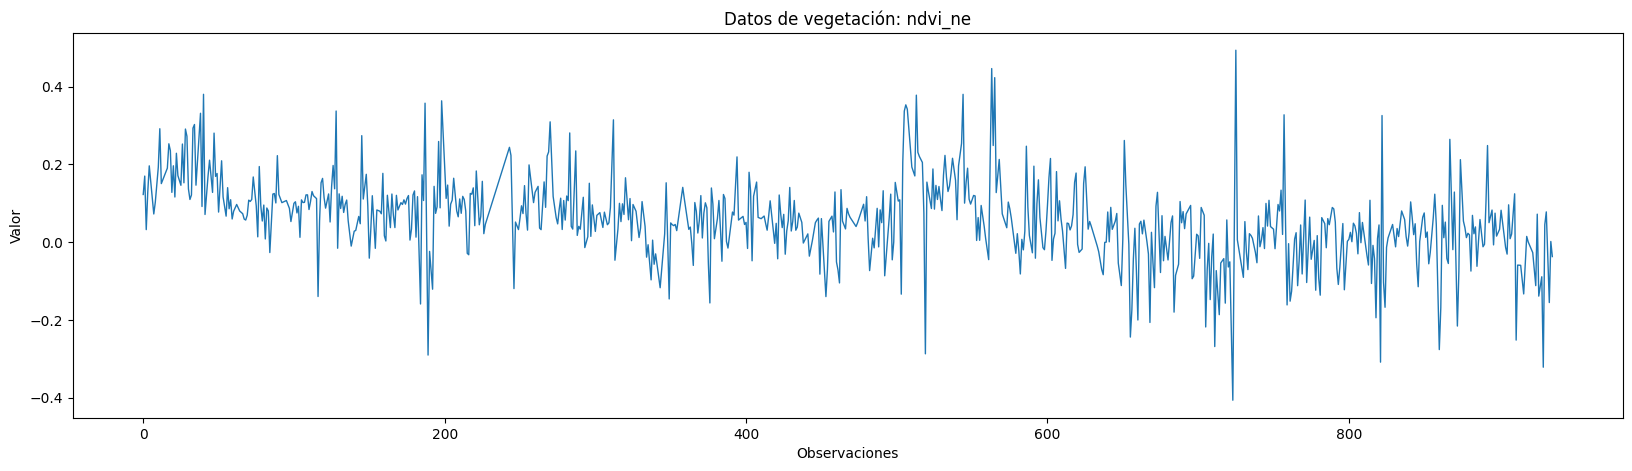

In [88]:
# Rellenamos los datos mediante una interpolación lineal

sj_df = sj_df.interpolate(method = 'linear')
iq_df = iq_df.interpolate(method = 'linear')

plt.figure(figsize = (20, 5))
(sj_df
     .ndvi_ne
     .plot
     .line(lw = 1))
plt.title('Datos de vegetación: ndvi_ne')
plt.xlabel('Observaciones')
plt.ylabel('Valor')
plt.show()

```
Considero que los variables faltantes han sido rellenados de
una manera aceptable.

Si bien esta tecnica mejor en datos cuyos faltantes sean más
esporadicos considero que es una técnica adecuada.
```

### Correlación entre variables

Realizaremos un análisis de correlación tomando especial énfasis en nuestra variable objetivo.

### Mapa de calor - todas las variables

Text(0.5, 1.0, 'Mapa de Correlacion arriba "San Juan" abajo "Iquitos"\n')

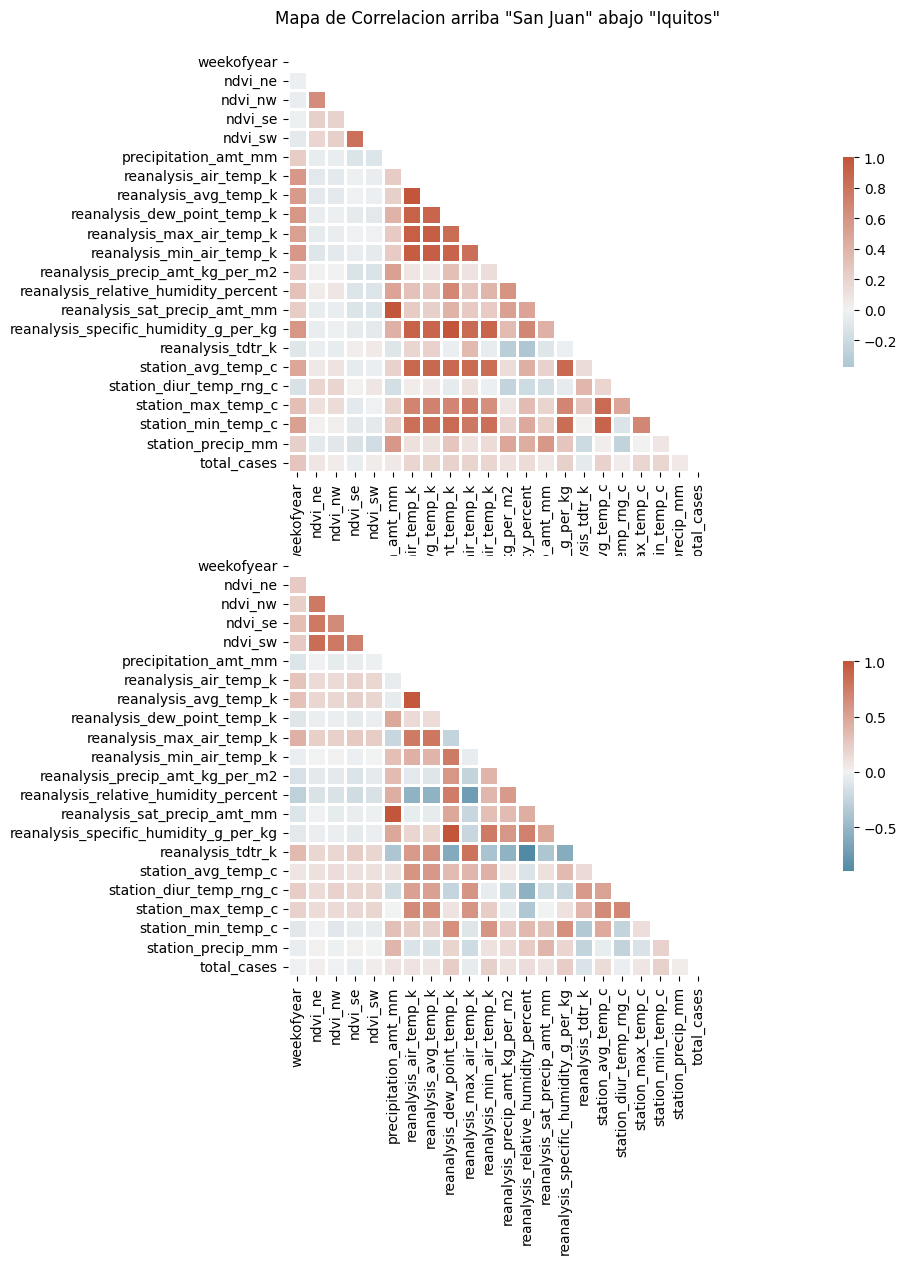

In [89]:
# Calcular la matriz de correlación
corr_sj = sj_df.drop(['city','year','week_start_date'], axis=1).corr()
corr_iq = iq_df.drop(['city','year','week_start_date'], axis=1).corr()


# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_sj, dtype=bool))

# Creamos los objetos subplot
fig, axs = plt.subplots( 2, 1, figsize = (35, 12))

# Mapeo de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creo las dos gráficas

sns.heatmap(corr_sj, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[0])
sns.heatmap(corr_iq, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[1])

axs[0].set_title('Mapa de Correlacion arriba "San Juan" abajo "Iquitos"\n')


<Axes: >

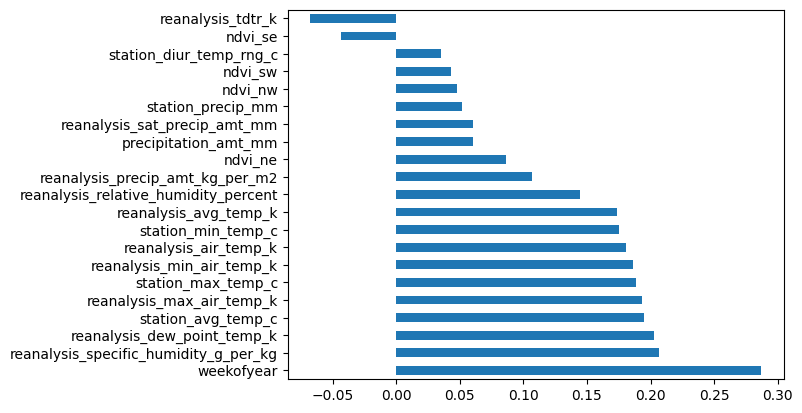

In [57]:
# San Juan
(corr_sj
     .total_cases
     .drop('total_cases') # quitamos la variable objetivo
     .sort_values(ascending=False)
     .plot
     .barh())

<Axes: >

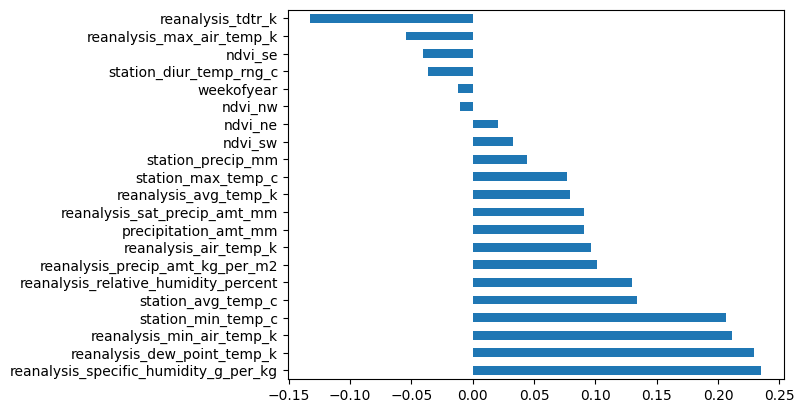

In [59]:
# Iquitos
(corr_iq
     .total_cases
     .drop('total_cases') # quitamos la variable objetivo
     .sort_values(ascending=False)
     .plot
     .barh())

```
Algunas conlcuiones de la gráfica de correlación.

- Para cada ciudad existen variables diferentes:

- Para cada ciudad tomaremos las cuatro mejores correlaciones.
```
Vamos a calular nuestros modelos con las siguientes cuatro variables para cada ciudad:

**San Juan**

1. 'weekofyear',
2. 'reanalysis_specific_humidity_g_per_kg'
2. 'reanalysis_dew_point_temp_k',
2. 'station_avg_temp_c'

Interesante observar que la mayor correlación en la ciudad de San Juan es con la variable `weekofyear` lo cual nos da indicios de temporalidad en esta ciudad, esto no ocurre con Iquitos, por lo que dependiendo del modelo el generar uno para cada ciudad puede resultar beneficioso.

**Iquitos**

1. 'reanalysis_specific_humidity_g_per_kg',
2. 'reanalysis_dew_point_temp_k',
3. 'reanalysis_min_air_temp_k'
4. 'tation_avg_temp_c',

*Nota: de acuerdo al análisis de la Actividad 1: 'reanalysis_specific_humidity_g_per_kg' y 'reanalysis_dew_point_temp_k' tienen una alta correlación entre ellas, podemos considerar una variable adicional en nuestros modelos*


### Analisis de las variables escogidas

Vamos a analizar los valores de las variables escogidas

Text(0.5, 1.0, 'Mapa de correlacion Principales caracteristicas')

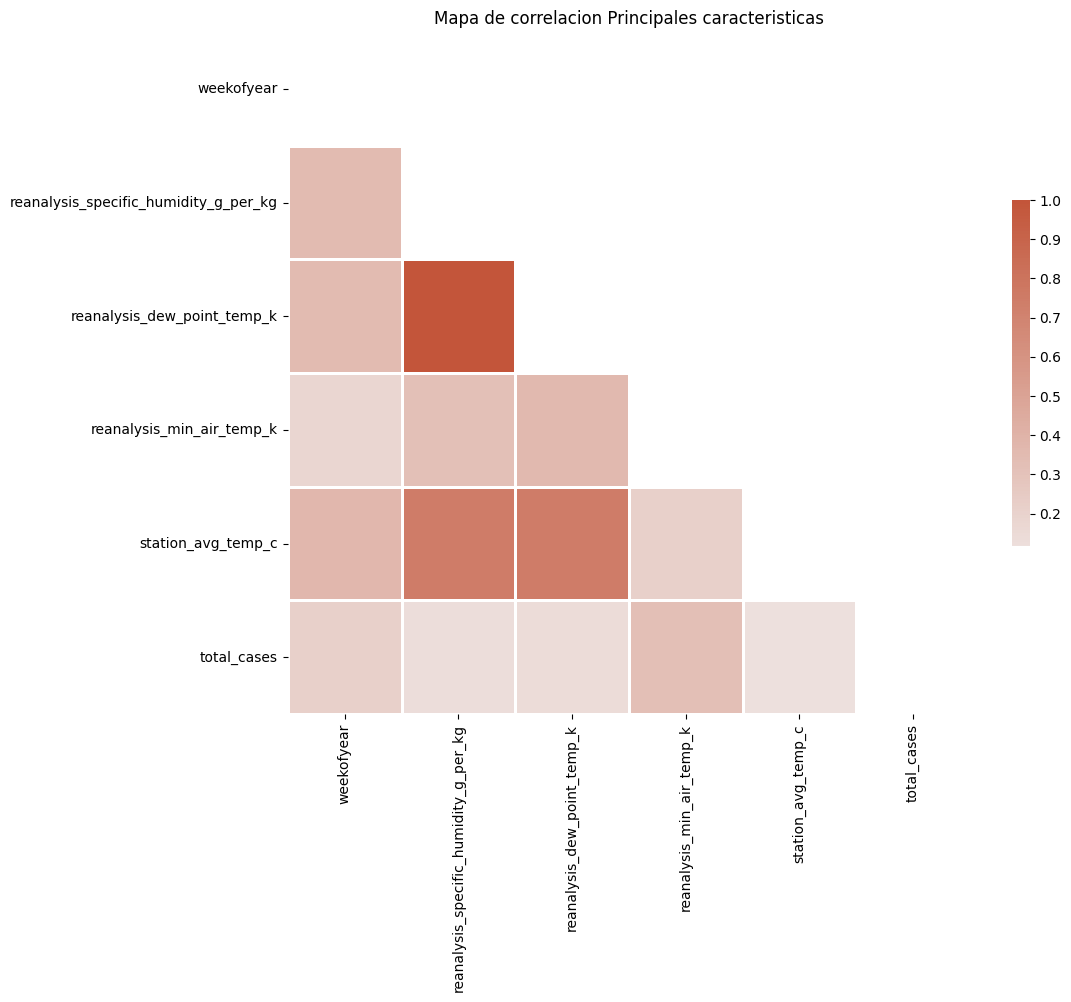

In [91]:
"""
   Creamos un mapa de correlacion con el las principales caracteristicas
"""
# Compute the correlation matrix
corr = train[['weekofyear',
              'reanalysis_specific_humidity_g_per_kg',
              'reanalysis_dew_point_temp_k',
              'reanalysis_min_air_temp_k',
              'station_avg_temp_c',
              'total_cases'
              ]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}).set_title("Mapa de correlacion Principales caracteristicas")

```
Hay una elevada correlación entre dos de las variables, puede ser que estan midiendo lo mismo,
algo a considerar en nuestro modelo.
```

## Resumen de la reexploración

En esta sección elaboraré una función que recoga todas las transformaciones y las aplique al dataset, con la finalidad de acelerar el proceso de experimentación

In [93]:
"""
    Esta función recibe el dataset 'train' que puede ser el dataset de entrenamiento que incluye
    ya la variable objetivo 'total_cases' o también puede recibir el dataset de prueba 'test'
    y lo prepara ejecutando las mismas transformaciones para poder realizar predicciones.
"""
from sklearn.preprocessing import MinMaxScaler

def eda_pipeline( train, features_to_keep ):

    # Copia del dataset en las variables que interesan
    data = train[features_to_keep].copy()

    # Rellenar valores faltantes con interpolación lineal
    data = data.interpolate(method = 'linear')

    # Normalización de variables.
    scaler = MinMaxScaler()
    df_normal = scaler.fit_transform( data )

    # Vuelvo a colocar la columna 'total_cases' sin normalizar
    if 'total_cases' in train.columns:
        df_normal = np.append( df_normal, train['total_cases'].values.reshape(-1,1), axis=1 )

    return df_normal

In [95]:
# Divido el dataset para cada ciudad

# Caracteristicas de San Juan
features_sj = [ 'weekofyear',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_dew_point_temp_k',
                'station_avg_temp_c']

# Caracteristicas de Iquitos
features_iq = [ 'reanalysis_min_air_temp_k',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_dew_point_temp_k',
                'station_avg_temp_c']

sj_df = train[train['city'] == 'sj']
iq_df = train[train['city'] == 'iq']

sj_train = eda_pipeline(sj_df, features_sj)
iq_train = eda_pipeline(iq_df, features_iq)

sj_test = test[test['city'] == 'sj']
iq_test = test[test['city'] == 'iq']

sj_test = eda_pipeline(sj_test, features_sj)
iq_test = eda_pipeline(iq_test, features_iq)

In [94]:
[sj_test.shape,iq_test.shape]

[(260, 4), (156, 4)]

In [73]:
# Muestra de la primera fila Array para entrenar San Juan,
# al final la variable objetivo sin normalizar
sj_train[0]

array([0.32692308, 0.29739227, 0.33993342, 0.35968379, 4.        ])

In [74]:
# Muestra de la primera fila Array para Probar el modelo
# al final no existe la variable objetivo, la cual se debe calular
iq_test[0]

array([0.76530612, 0.66829149, 0.72153465, 0.60559006])

## Análisis de la variable objetivo

Hasta este momento hemos analizado los valores tal cual, sin embargo puede resultar beneficioso analizar la relación causa -> efecto.

El efecto de las mediciones realizadas pueden no ser inmediato, es decir la lluvia de un día puede tener un efecto porsterior en la población.

El mosquito necesita tiempo para su incubación en aguas reposadas, las cuales pueden provenir de la lluvia, por tanto analizaremos el dataset retrasando el efecto de la variable objetivo.


In [171]:
# Volvemos a separar las features, de los labels.

# Divido el dataset para cada ciudad
sj_df_1week = train[train['city'] == 'sj'].drop('total_cases', axis = 1).copy()
iq_df_1week = train[train['city'] == 'iq'].drop('total_cases', axis = 1).copy()

label_sj = train[train['city'] == 'sj']['total_cases'].copy()
label_iq = train[train['city'] == 'iq']['total_cases'].copy()

# Elimino la primera observación de label y la última de train,
# de esta manera establezco que el total de casos se deben a lo
# ocurrido en la semana anterior
label_sj = label_sj.drop(label_sj.index[0])
label_iq = label_iq.drop(label_iq.index[0])

# Reseteo los indices de las etiquetas para que vuelva a iniciar en 0
label_sj.reset_index(drop = True, inplace = True)
label_iq.reset_index(drop = True, inplace = True)

# Eliminio la última observación de los features de cada ciudad
sj_df_1week = sj_df_1week.drop(sj_df_1week.index[-1])
iq_df_1week = iq_df_1week.drop(iq_df_1week.index[-1])

# Reseteo los indices de Iquitos para que inicien en 0 igual que su label
iq_df_1week.reset_index(drop = True, inplace = True)

# Vuelvo a unir el dataframe con la etiqueta ambas inician en cero sus indices
sj_df_1week = pd.concat([sj_df_1week, label_sj], axis = 1)
iq_df_1week = pd.concat([iq_df_1week, label_iq], axis = 1)

# Uno ambas ciudades en el mismo dataset
train_1week = pd.concat([sj_df_1week, iq_df_1week], axis = 0).reset_index(drop=True)

In [184]:
# Volvemos atrás dos semanas

# Divido el dataset para cada ciudad
sj_df_2week = train[train['city'] == 'sj'].drop('total_cases', axis = 1).copy()
iq_df_2week = train[train['city'] == 'iq'].drop('total_cases', axis = 1).copy()

label_sj = train[train['city'] == 'sj']['total_cases'].copy()
label_iq = train[train['city'] == 'iq']['total_cases'].copy()

# Elimino la primera observación de label y la última de train,
# de esta manera establezco que el total de casos se deben a lo
# ocurrido en la semana anterior
label_sj = label_sj.iloc[2:]
label_iq = label_iq.iloc[2:]

# Reseteo los indices de las etiquetas para que vuelva a iniciar en 0
label_sj.reset_index(drop = True, inplace = True)
label_iq.reset_index(drop = True, inplace = True)

# Eliminio la última observación de los features de cada ciudad
sj_df_2week = sj_df_2week.iloc[:-2]
iq_df_2week = iq_df_2week.iloc[:-2]

# Reseteo los indices de Iquitos para que inicien en 0 igual que su label
iq_df_2week.reset_index(drop = True, inplace = True)

# Vuelvo a unir el dataframe con la etiqueta ambas inician en cero sus indices
sj_df_2week = pd.concat([sj_df_2week, label_sj], axis = 1)
iq_df_2week = pd.concat([iq_df_2week, label_iq], axis = 1)

# Uno ambas ciudades en el mismo dataset
train_2week = pd.concat([sj_df_2week, iq_df_2week], axis = 0).reset_index(drop=True)

In [185]:
train_2week.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,3
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,6
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,2
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,4


In [179]:
train_1week.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,5
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,4
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,3
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,6
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,2


```
Se han generado los siguientes nuevos datasets:

- train_1week, observaciones retrasadas una semana
- train_2week, observaciones retradadas dos semanas

A continuación analizaremos la correlación de este nuevo dataset
```

<Axes: >

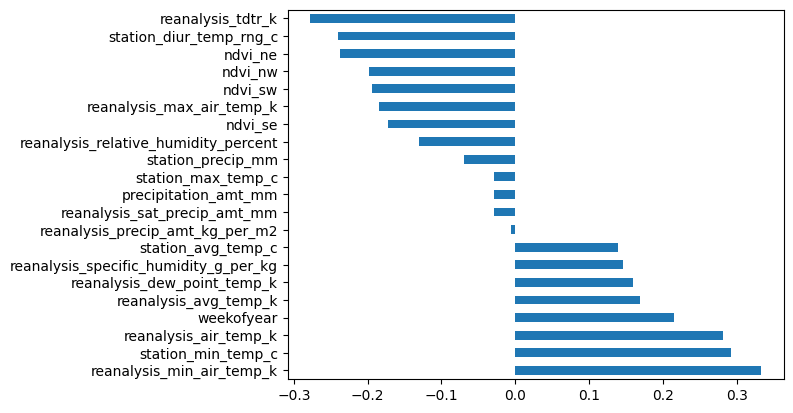

In [186]:
# Correlacion de variables (1 semana) en relacion con la objetivo.
corr = train_1week.drop(['city','year','week_start_date'], axis=1).corr()

(corr
     .total_cases
     .drop('total_cases') # quitamos la variable objetivo
     .sort_values(ascending=False)
     .plot
     .barh())

<Axes: >

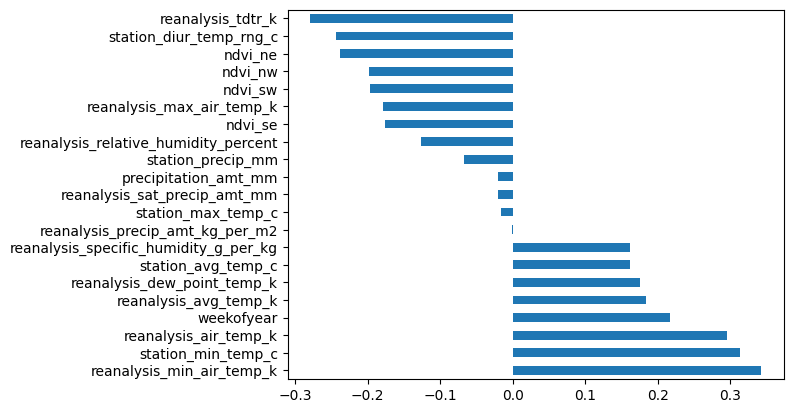

In [189]:
# Correlacion de variables (1 semana) en relacion con la objetivo.
corr = train_2week.drop(['city','year','week_start_date'], axis=1).corr()

(corr
     .total_cases
     .drop('total_cases') # quitamos la variable objetivo
     .sort_values(ascending=False)
     .plot
     .barh())

```
Se puede visualizar un incremento en la correlacion de las features
con la variable objetivo.

No hay mucha diferencia entre una semana y dos semanas de retraso.
```

Avanzaremos con el dataset retrasado en una semana.

Luego, pora poder reducir la dimensionalidad de nuestro dataset y conla esperanza de caputurar de mejor manera la interaccion de variables similare realizaremos un análisis de PCA por grupos o bloques de medidas similares.

### PCA por grupos de variables

El primer paso será normalizar las variables.

Aplicaremos el PCA en los siguientes grupos de variables, la intención es agrupar variables que tienen una similar correlación con los casos totales, la intención es mantener y/o aumentar la correlación de estas variables respecto a los casos totales.

**Mantenemos** la variale de ciudad, permitira al Random Forest hacer la particion por ciudades.

**Grupo 1** (vegetacion)
- ndvi_se
- ndvi_sw
- ndvi_ne
- ndvi_nw

**Grupo 2** (correlacion negativa)
- reanalysis_tdtr_k
- station_diur_temp_range_c
- reanalysis_max_air_temp_k
- reanalysis_relative_humidity_percent

**Grupo 3**
- reanalysis_specific_humidity_g_per_kg
- station_avg_temp_c
- reanalysis_dew_point_temp_k
- reanalysis_avg_temp_k

Mantenemos las tres variables mas fuertemente correlacionadas a la variable objetivo.
- reanalysis_air_temp_k
- station_min_temp_c
- reanalysis_min_air_temp_k

In [ ]:
# Utilizaré la variable de ciudad en el Random Forest
# 1 -> San Juan
# 0 -> Iquitos

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

train_1week['city'] = lb.fit_transform(train_1week['city'])

randomPCA_test = test.copy()
randomPCA_test['city'] = lb.fit_transform(randomPCA_test['city'])


Cantidad única de casos en San Juan: 134
Cantidad unica de casos en Iquitos: 46


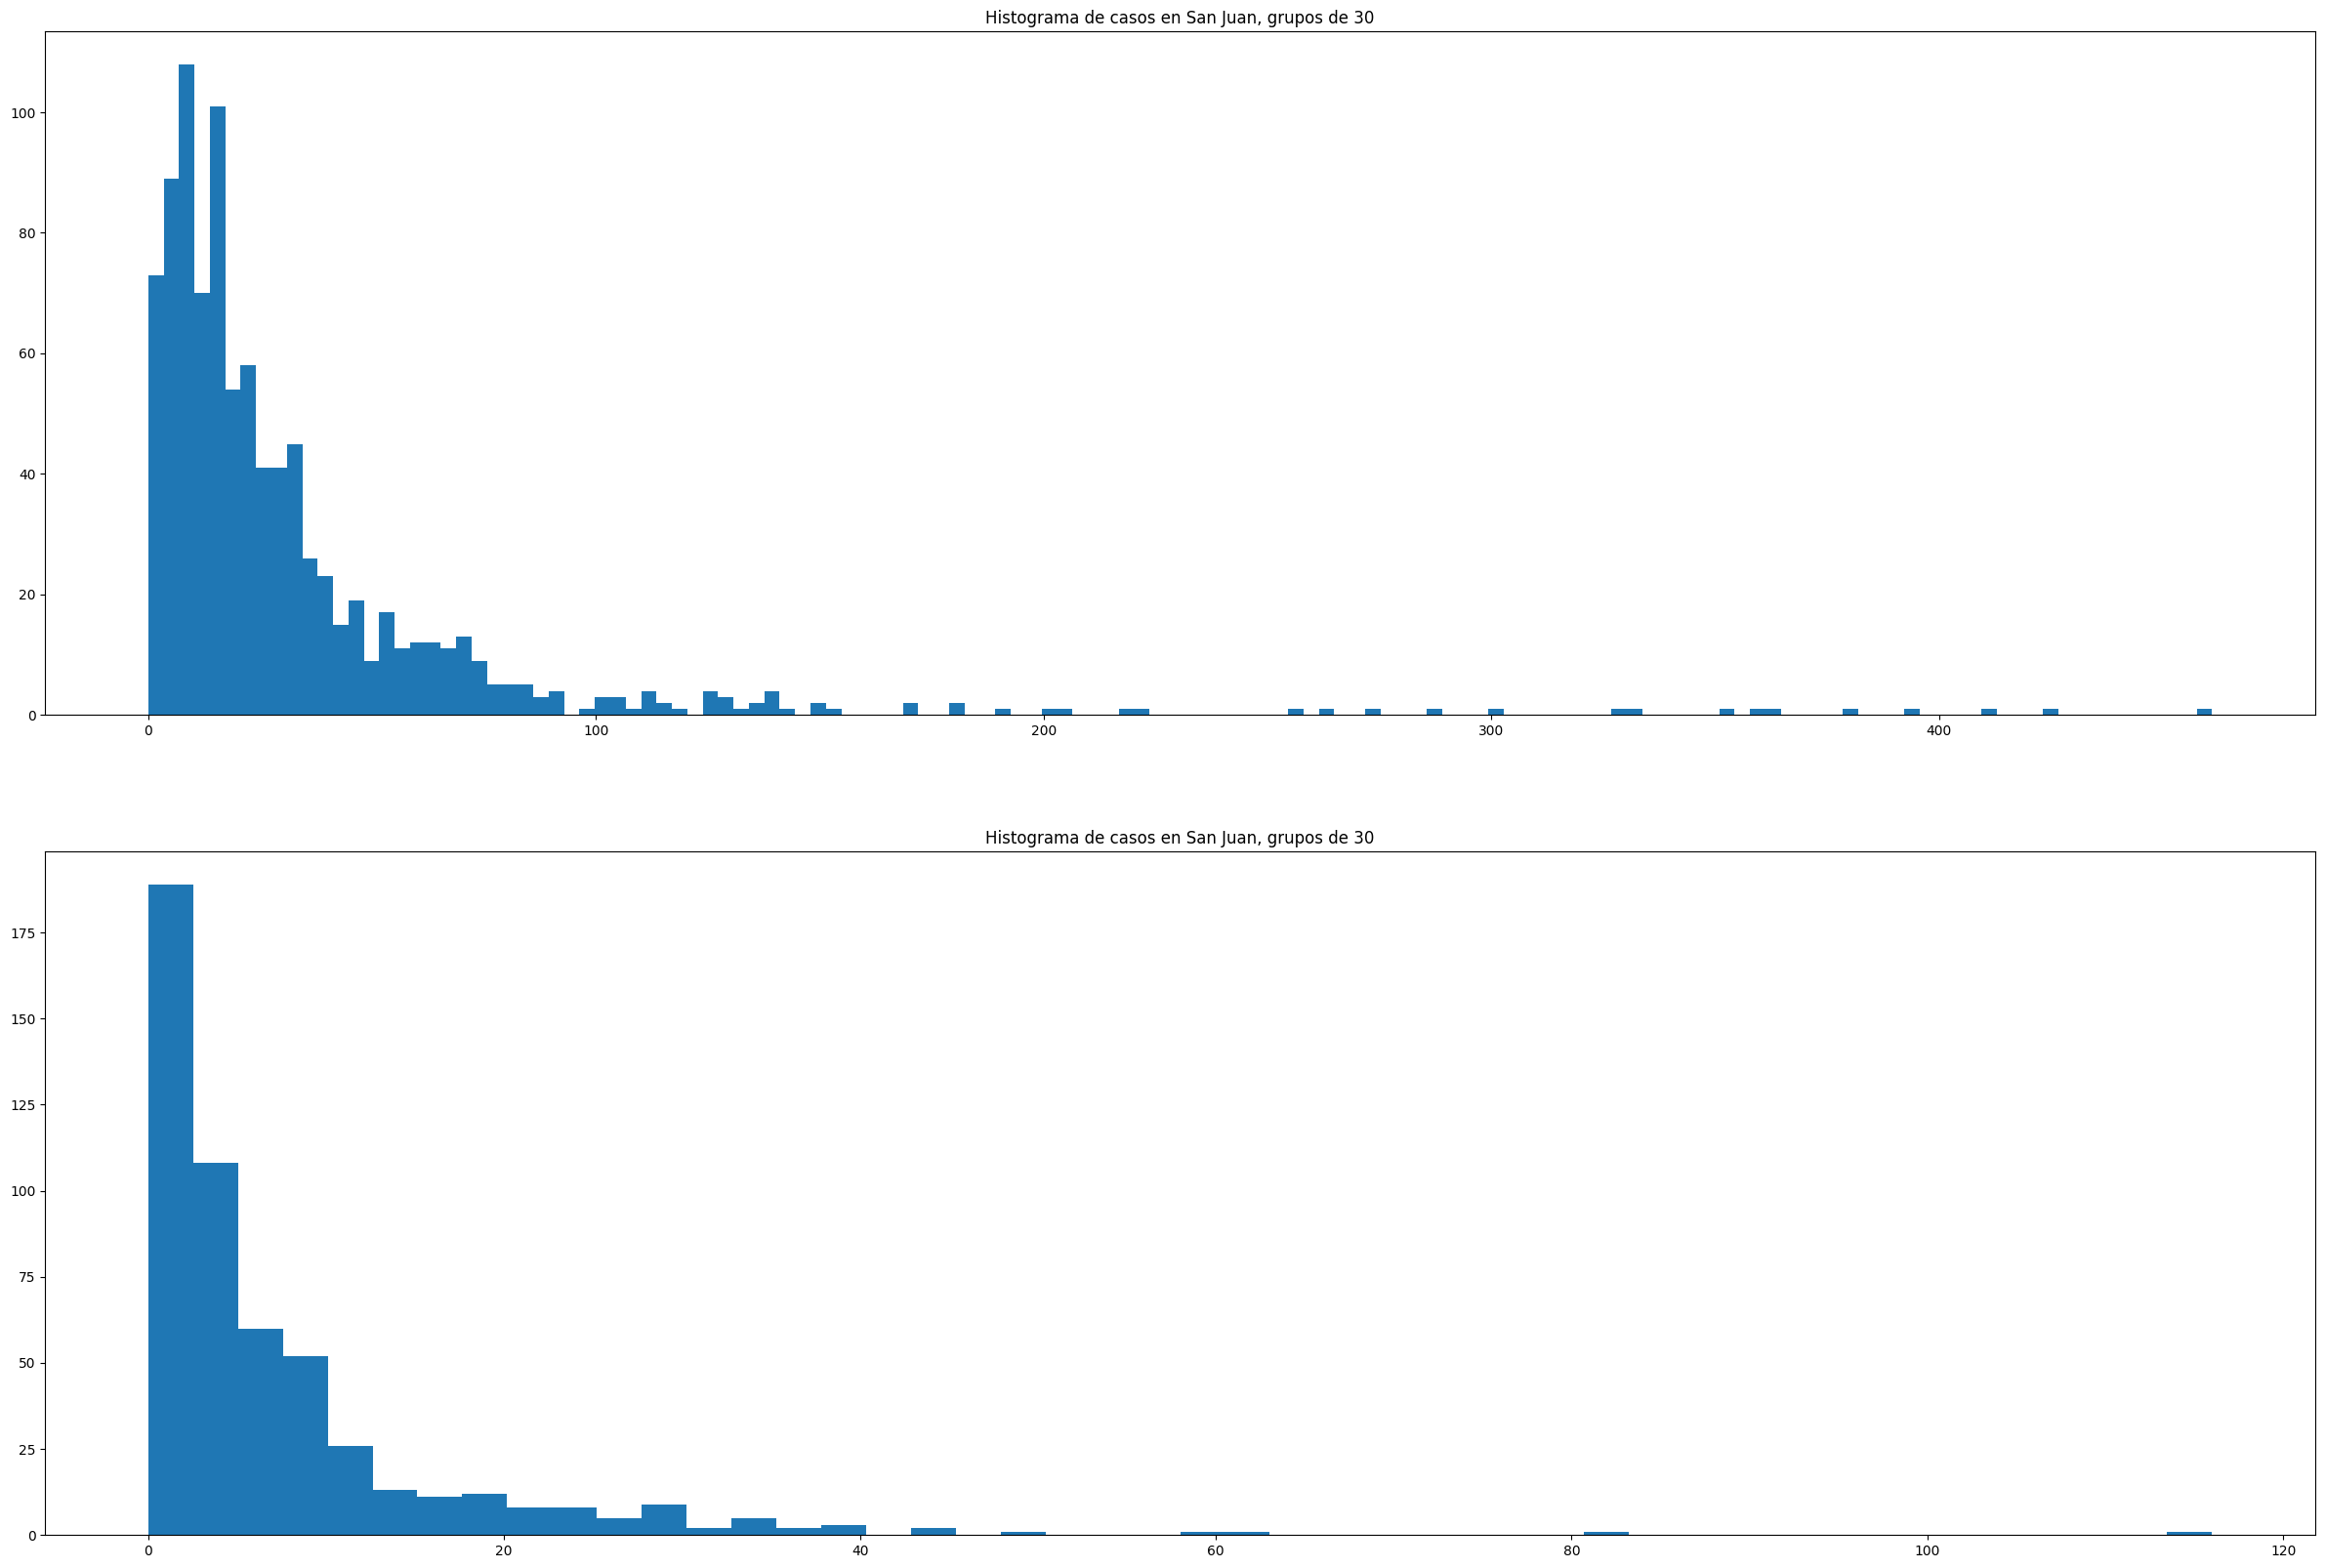

In [109]:
plt.figure(figsize = (30, 20))

plt.subplot(2, 1, 1)
plt.hist(sj_df['total_cases'], bins = 134)
plt.title('Histograma de casos en San Juan, grupos de 30')

print( "Cantidad única de casos en San Juan: {}".format( sj_df['total_cases'].nunique() ))

plt.subplot(2, 1, 2)
plt.hist(iq_df['total_cases'], bins = 46)
plt.title('Histograma de casos en San Juan, grupos de 30')

print( "Cantidad unica de casos en Iquitos: {}".format( iq_df['total_cases'].nunique() ))



plt.show()

In [177]:
train_bin = train.copy()

# Bin the column without labels first
train_bin['binned_column'] = pd.cut(train_bin['total_cases'], bins=130)

# Group by the bins and find the most common value in each
bin_labels = train_bin.groupby('binned_column')['total_cases'].apply(lambda x: x.mode()[0] if not x.empty else None)

# Map the bin intervals to the mode values
train_bin['binned_column'] = train_bin['binned_column'].map(bin_labels)

In [179]:
train_bin[['total_cases','binned_column']].sample(100)

,total_cases,binned_column
623,1,0.0
312,4,6.0
693,32,33.0
842,4,6.0
326,12,11.0
...,...,...
1268,13,11.0
53,12,11.0
389,70,68.0
906,170,169.0


In [188]:
# la idea es que para numeros pequeños mantener los valores, pero agrupar los numeros grandes de tal
# manera que tengamos menos valores únicos.... no se si funcione
# primero implementare el random forest con todos.
bins_special = np.sort(train['total_cases'].unique())
bins_special

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        80,  81,  82,  83,  84,  85,  89,  90,  91,  92,  99, 101, 102,
       104, 106, 108, 112, 115, 116, 119, 126, 127, 128, 129, 131, 135,
       137, 140, 141, 142, 149, 150, 154, 169, 170, 179, 181, 191, 202,
       204, 220, 221, 256, 263, 272, 288, 302, 329, 333, 353, 359, 364,
       381, 395, 410, 426, 461])

---
# Predicción
---

<font color="green">*\[\[Esta es la sección más importante de esta práctica. Aquí se irán describiendo y ejecutando los distintos experimentos, incluyendo la optimización de hiperparámetros, intercalando celdas de texto y código.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Cada modelo descrito debe tener un nombre (RandomForest-A, RandomForestB... por ejemplo) que sirva para identificarlo en la tabla resumen de la sección "Conclusiones".\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Al igual que en el resto de análisis, no sirve ejecutar los algoritmos sin más, como si fueran una caja negra, sino que hay que discutir y razonar los resultados de forma que vayan guiando el discurso de la práctica en cada paso siguiente.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Asimismo, cada prueba descrita debe figurar en el notebook y ser ejecutable. No sirve comentar o mostrar resultados de pruebas que no estén programadas en este mismo notebook y que sean reproducibles por el profesor.\]\]*</font>

<font color="green">*\[\[Será necesario probar y describir en la memoria varios algoritmos de ML, analizar los resultados, replantear las características seleccionadas (si procede), elegir al menos un algoritmo prometedor de entre los probados y por último optimizar bien sus hiperparámetros.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: El algoritmo LinearRegression aquí mostrado como ejemplo NO se tendrá en cuenta a la hora de corregir. Únicamente podría ser útil para tener una línea de base sobre la que comparar los algoritmos que hemos visto en clase u otros de ML que el estudiante quiera explorar aquí.\]\]*</font>

## KNN-1

El primer intento que se utilizará sera la prediccióñ mediante "Nearest Neighbors".

Datos importantes a tomar en cuenta:

- Se ha dividido el dataset y entrenado independientemente para cada ciudad.
- Tomamos las cuatro mejores variables que tienen la mayor correlación con nuestra variable objetivo
- Estas variables son diferentes para cada ciudad.
- Para San Juan hemos incluido la variable `weekofyear` que norlamente la eliminabamos.

Tomamos como punto de partida el notebook visto en clase `"1 - KNN - Regresión"` ajustandolo a nuestro dataset el cual es de tipo `ndarray`



In [77]:
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

cv = KFold( n_splits = 5, shuffle = True, random_state = seed )

Max Value uniform : 0.04485720787347821 (19)
Max Value distance : 0.03419615428376379 (13)


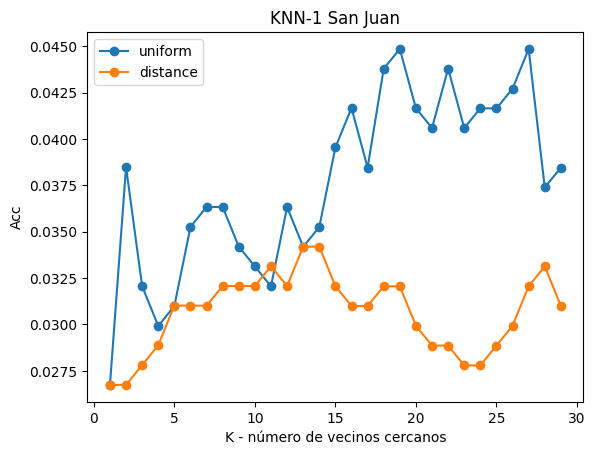

In [89]:
# KNN -  San Juan

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
       for train_fold, test_fold in cv.split(sj_train):
          # División train test aleatoria
          f_train = sj_train[train_fold]
          f_test  = sj_train[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train[:, :-1], y = f_train[:, -1])
          y_pred = knn.predict(X = f_test[:, :-1])
          # evaluación del modelo
          acc = accuracy_score(f_test[:, -1], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')


plt.legend()
plt.xlabel('K - número de vecinos cercanos')
plt.title('KNN-1 San Juan')
plt.show()



```
Existe una marcada diferencia entre los tipos 'uniform' y 'distance'

Claramente nuestros mejores Hiperparametros son: 'uniform' : '19' vecinos

La precisión de las predicciónes es extremadamente baja: 4.4%

```
La diferencia enntre el tipo 'uniform' y 'distance' probablemente se debe a la correlación entre variables.

Para San Juan
 -  'weekofyear',
 -  'reanalysis_specific_humidity_g_per_kg',
 -  'reanalysis_dew_point_temp_k',
 -  'station_avg_temp_c'

Tres de las variables estan altamente relacionadas entre si.

> **Nuestro bajo valor de predicción es un indicativo de que las variables escogidas y/o el tratamiento previo de los datos no ha sido el adecuado.**


Max Value uniform : 0.18269230769230768 (24)
Max Value distance : 0.15961538461538463 (28)


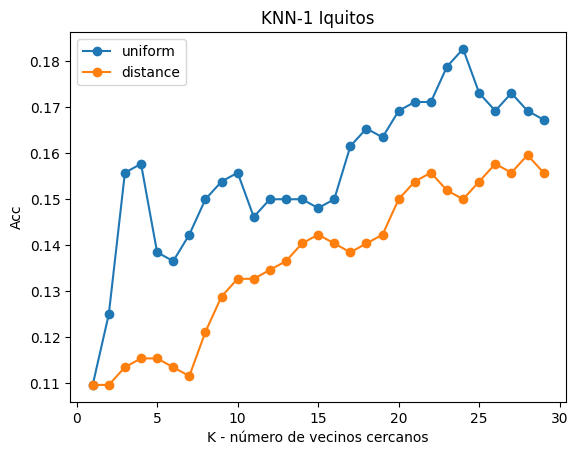

In [90]:
# KNN - Iquitos

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
       for train_fold, test_fold in cv.split(iq_train):
          # División train test aleatoria
          f_train = iq_train[train_fold]
          f_test  = iq_train[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train[:, :-1], y = f_train[:, -1])
          y_pred = knn.predict(X = f_test[:, :-1])
          # evaluación del modelo
          acc = accuracy_score(f_test[:, -1], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')


plt.legend()
plt.xlabel('K - número de vecinos cercanos')
plt.title('KNN-1 Iquitos')
plt.show()


```
Hay una mejora muy significativa en cuanto a la presición: 18.2%

Si bien el hiperparámetro 'uniform' es superior, no observamos un
decaimiento a medida que se aumentan los vecinos como ocurrió con
San Juan

```
Caracteristicas de Iquitos

- 'reanalysis_min_air_temp_k',
- 'reanalysis_specific_humidity_g_per_kg',
- 'reanalysis_dew_point_temp_k',
- 'station_avg_temp_c'

**Posibles causas:**
- Las caracteristicas y/o mediciones de ambas ciudades son distintos
- La correlación entre las variables es muy alta (miden lo mismo)
- No es el algoritmo indicado para el conjunto de datos.



## KNN 2

Vamos a realizar el mismo algoritmo pero esta vez variando un poco las variables.

##### **Nuestra hipotesis es que la alta correlación entre variables escogidas establece un techo para el algortimo.**

Introduciremos las variables:

- 'reanalysis_precip_amt_kg_per_m2'

> TLDR: No obtenemos mejores resultados que con KNN-1

In [85]:
# Divido el dataset para cada ciudad

# Caracteristicas de San Juan
features_sj = [ 'weekofyear',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_precip_amt_kg_per_m2',
                'station_avg_temp_c']

# Caracteristicas de Iquitos
features_iq = [ 'reanalysis_min_air_temp_k',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_precip_amt_kg_per_m2',
                'station_avg_temp_c']

sj_df = train[train['city'] == 'sj']
iq_df = train[train['city'] == 'iq']

sj_train = eda_pipeline(sj_df, features_sj)
iq_train = eda_pipeline(iq_df, features_iq)

sj_test = test[test['city'] == 'sj']
iq_test = test[test['city'] == 'iq']

sj_test = eda_pipeline(sj_test, features_sj)
iq_test = eda_pipeline(iq_test, features_iq)

Max Value uniform : 0.044868585732165206 (29)
Max Value distance : 0.039549436795995 (27)


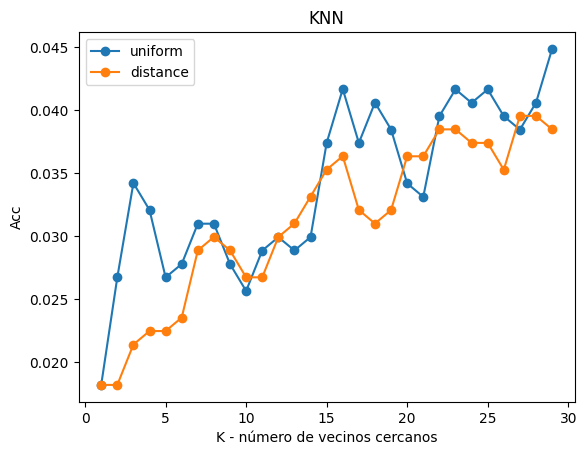

In [86]:
# KNN -  San Juan

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
       for train_fold, test_fold in cv.split(sj_train):
          # División train test aleatoria
          f_train = sj_train[train_fold]
          f_test  = sj_train[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train[:, :-1], y = f_train[:, -1])
          y_pred = knn.predict(X = f_test[:, :-1])
          # evaluación del modelo
          acc = accuracy_score(f_test[:, -1], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')


plt.legend()
plt.xlabel('K - número de vecinos cercanos')
plt.title('KNN-2 San Juan')
plt.show()

```
Interesante notar como con el cambio de una variable mejora notablemente
el desempeño del hiperparámetro 'distance'
```

Max Value uniform : 0.18076923076923077 (18)
Max Value distance : 0.17115384615384616 (26)


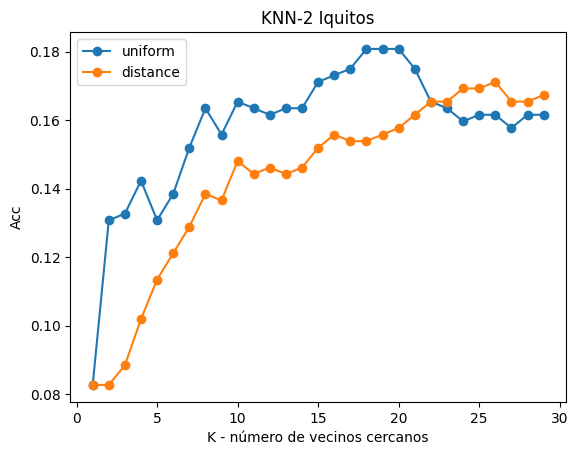

In [87]:
# KNN - Iquitos

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
       for train_fold, test_fold in cv.split(iq_train):
          # División train test aleatoria
          f_train = iq_train[train_fold]
          f_test  = iq_train[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train[:, :-1], y = f_train[:, -1])
          y_pred = knn.predict(X = f_test[:, :-1])
          # evaluación del modelo
          acc = accuracy_score(f_test[:, -1], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')


plt.legend()
plt.xlabel('K - número de vecinos cercanos')
plt.title('KNN-2 Iquitos')
plt.show()

```
Para Iquitos algo notable es que con el cambio de una variable el "ascenso"
de la preción se produce con menos vecinos.
```

Es un nueva indicación de que las variables a escoger y su tratamiento son muy importantes, (quizá más importates que los hiperparámetros)

A continuación exploraremos otros algoritmos en búsqueda de mejores resultados.

--------------------------

## Random Forest

Conociendo las limitacionde de los "Árboles de decisión" vamos a realizar un intento directamente pasando a 'Random Forest' realizaré un primer modelo más sencillo explorando algunos parámetros, luego utilizaremos GridSearch ayudanonos a explorar más profundamente las posibilidades de hiperparámetros.


### Dataset para Random Forest

En nuestro primer intento de KNN dividimos el dataset y los experimentos para cada ciudad.

En el caso de RandomForest tomaremos todo el dataset, e incluiremos la variable 'city' binarizada, de esta manera el algoritmo se encargara de tomar la desición de predicción para una ciudad u otra.

Para ello preparamos un nuevo dataset que se utilizará en Random Forest.

In [98]:
# Utilizaré la variable de ciudad en el Random Forest
# 1 -> San Juan
# 0 -> Iquitos

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

randomF_df = train.copy()
randomF_df['city'] = lb.fit_transform(randomF_df['city'])

randomF_test = test.copy()
randomF_test['city'] = lb.fit_transform(randomF_test['city'])


# Caracteristicas para el random forest


features_rf = [ 'city',
                'reanalysis_min_air_temp_k',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_dew_point_temp_k',
                'station_avg_temp_c']

randomF_train = eda_pipeline(randomF_df, features_rf)
randomF_test = eda_pipeline(randomF_test, features_rf)

# Volver a convertir de ndarray a Dataframe

random_test_df = pd.DataFrame( randomF_test, columns = features_rf )
features_rf.append('total_cases')
random_train_df = pd.DataFrame( randomF_train, columns = features_rf )


Al utilizar nuestra función `eda_pipeline()` nuestros valores serán normalizados, sin embargo, investigando un poco esto no debería afectar negativamente al algoritmo de random forest.

### GUARDAR / CARGAR pickles


In [2]:
import pickle

#guardar a pickle "random_train_df"
archivo_train = "random_train_df.pkl"
archivo_test = "random_test_df.pkl"



In [ ]:

with open(archivo_train, 'wb') as archivo_salida:
    pickle.dump(train_rf, archivo_salida)

with open(archivo_test, 'wb') as archivo_salida:
    pickle.dump(test_rf, archivo_salida)


In [3]:
# read previously saved pickles


with open(archivo_train, 'rb') as archivo_entrada:
    random_train_df = pickle.load(archivo_entrada)

with open(archivo_test, 'rb') as archivo_entrada:
    random_test_df = pickle.load(archivo_entrada)

## RandomForest-A

Primer acercamiento, mas "sencillo" sin `Cross Validation` para probar las aguas.


In [99]:
random_train_df.head() # dataset normalizado, no hay alteracion en 'city' ni en 'total_cases'

,city,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,total_cases
0,1.0,0.692308,0.262659,0.314680,0.430091,4.0
1,1.0,0.730769,0.418164,0.489213,0.565350,5.0
2,1.0,0.800000,0.586900,0.657583,0.565350,4.0
3,1.0,0.776923,0.566808,0.643471,0.645897,3.0
4,1.0,0.815385,0.628226,0.701541,0.802432,6.0


In [100]:
# Dividimos en train test el dataset
X = random_train_df.iloc[:, :-1]
y = random_train_df.iloc[:, -1]

In [101]:
# En este primer intento vamos con Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [102]:
# Para nuestro primer acercamiento exploraremos solamente un hiperparámetro: n_estimators
# Vamos a ir re-ejecutando este cóidgo y los resultados obtenidos se resumiran en una tabla

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 23, random_state = seed)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=23, random_state=42)

In [104]:
y_pred = regressor.predict(X_test)

"""
   Nuestro mejor parametro es n_estimators = 23
   Con esto vamos a predecir nuestro dataframe _test_
   Subiremos estos valores al csv para poder comprarlos
   con KNN y evaluar el mejor modelo.
"""

randomF_B_prediction = regressor.predict(random_test_df)

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_rfA = mean_absolute_error(y_test, y_pred)
mse_rfA = mean_squared_error(y_test, y_pred)
r2_rfA = r2_score(y_test, y_pred)

print("MAE: ", mae_rfA)
print("MSE: ", mse_rfA)
print("R2: ", r2_rfA)

MAE:  24.134157236450267
MSE:  2792.6775060206646
R2:  0.13003974332875579


##### Resultados Random Forest A

| n_estimators |    MAE    |   MSE  |   R2   |
|--------------|-----------|--------|--------|
| 10 | 24.50 | 2852 | 0.11   |
| 23 | 24.13 | 2792 | 0.130  |
| 25 | 24.26 | 2810 | 0.124  |
| 28 | 24.24 | 2811 | 0.124  |
| 50 | 24.54 | 2843 | 0.11   |
| 75 | 24.26 | 2809 | 0.124  |
| 100| 24.36 | 2833 | 0.117 |

De la tabla podemos concluir que nuestro valor ideal esta alrededor de los 25, más estimadores no mejoran significativamente los resultados


## Random Forest-B

Basados en la experiencia de Random Forest-A exploraremos buscaremos `n_estimators` y también variaremos algunos otro hiperparametros que permitan obtener un mejor modelo.

- `n_estimators` : La hipótesis es que el vamor optimo es cecano a 25
- `max_depth` : Exploraremos varios valores, debido a la baja correlación entre variables esperamos que este parametro nos ayude a encontrar relaciones no evidentes en las correlaciones.

-

In [60]:
param_grid = {
    'n_estimators': [18,23,25,26,70,200],  # número de árboles
    'max_depth': [None,5,20,50],              # profundidad máxima de los árboles
    'min_samples_split': [2,5,10],        # número mínimo de muestras para dividir un nodo interno
    'min_samples_leaf': [1,2,4],          # número mínimo de muestras en cada hoja
}



In [61]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring = 'neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [18, 23, 25, 26, 70, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [62]:
y_pred_rfB = grid_search.predict(X_test)

In [63]:
mae_rfA = mean_absolute_error(y_test, y_pred_rfB)
mse_rfA = mean_squared_error(y_test, y_pred_rfB)
r2_rfA = r2_score(y_test, y_pred_rfB)

print("MAE: ", mae_rfA)
print("MSE: ", mse_rfA)
print("R2: ", r2_rfA)

MAE:  24.394842284933286
MSE:  2888.7120609211556
R2:  0.10012356222641772


```
Utilizando el método GRID Search no pudimos un mejor estimado que utilizando
variaciones en n_estimators
```

Esta es una indicación de que para mejorar nuestros resultados, debemos mejorar los datos ingresados al modelo y realizar una exploración más profunda.

## Generamos CSV resultado

### Knn - primer intento

In [118]:
# KNN-1 - Predicciones para San Juan

knn = neighbors.KNeighborsClassifier( 19 , weights='uniform')
knn.fit( X = sj_train[:, :-1], y = sj_train[:, -1])
y_pred_sj = knn.predict(X = sj_test)


# KNN-1 - Predicciones para Iquitos

knn = neighbors.KNeighborsClassifier( 24 , weights='uniform')
knn.fit( X = iq_train[:, :-1], y = iq_train[:, -1])
y_pred_iq = knn.predict(X = iq_test)


# Datos Originales
og_test = test[['city','year','weekofyear']].copy()
sj_submission = og_test[og_test['city'] == 'sj'].copy()
iq_submission = og_test[og_test['city'] == 'iq'].copy()

sj_submission['total_cases'] = y_pred_sj.astype(int)
iq_submission['total_cases'] = y_pred_iq.astype(int)

In [113]:
knn1 = pd.concat([sj_submission, iq_submission])

knn1.to_csv('submission_knn1.csv', index=False)

### Random Forest A - segundo intento



In [106]:
# Nuestras predicciones se encuentran en el dataset
# randomF_B_prediction

total_cases_test = randomF_B_prediction.astype(int)
total_cases_test


array([ 16,  20,  15,   9,  57,  22,  92,  16,  37,  32,  57,  43,  40,
        30,  63, 110,  83,  53, 107,  61,  49,  28,  78,  35,  46,  60,
        72,  31,  42, 103,  42,  28,  26,  21,  18,  21,  19,  15,  15,
        31,  22,  30,  41,  23,  28,  17,  27,  17,  31,  21,  21,   7,
        19,  24,  66,  52,  35,  97,  83,  38, 235,  41,  22,  71,  92,
        80,  68,  62,  28,  98,  52,  82,  30,  40, 110,  96, 110,  77,
        24, 130,  50,  50,  33,  74,  72,  70,  42,  44,  65,  22,  26,
        51,  35,  11,  42,  45,  77,  33,  36,  68,  67,  12,  10,  55,
        32,  25,  58,  26,  28,  69,  68,  36,  50,  57,  61, 115,  57,
        57,  60, 110,  59, 129,  68,  83,  67,  41,  39,  60,  54,  47,
        94,  26,  37,  37,  20,  25,  25,  37,  16,  15,  27,  17,  30,
        21,  18,  12,  13,  21,  29,  36,  23,  19,  13,  25,  16,  24,
        18,  46,  22,  23,  35,  63,  46,  57,  64,  62,  44,  43,  30,
        62,  38,  56,  53,  57,  54,  70,  61,  69,  49,  53,  4

In [107]:
# Datos Originales

og_test = test[['city','year','weekofyear']].copy()
og_test['total_cases'] = total_cases_test
og_test.to_csv('submission_rfA.csv', index=False)

El resultado obtenido supero a KNN sin embargo esta muy lejos de un valor aceptable.

Conclusiones:

 - Random Fores es mejor que KNN
 - Es necesario trabajar en exploración.

-------------------

# VAMOS HASTA AQUÍ

<font color="green">*\[\[Postprocesar el resultado.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: DrivenData necesita que el orden de las predicciones sea el mismo que en el fichero de test, así como que se una predicción por cada instancia de test. Sino, la web no aceptará el fichero de la submission.\]\]*</font>

In [ ]:
# EJEMPLO: Redondear el resultado y convertirlo a entero
y = np.rint(y_pred) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

# EJEMPLO: Cambiar valores negativos a cero
res[y_pred < 0] = 0
res

array([25, 30, 32, 44, 36, 49, 37, 41, 38, 47, 40, 55, 42, 46, 37, 44, 39,
       38, 39, 29, 40, 30, 22, 42, 31, 35, 40, 43, 39, 36, 33, 24, 30, 25,
       16, 16, 16, 31, 27, 26, 27, 27, 25, 17, 25, 21, 17, 19, 17, 24, 33,
       28, 29, 29, 38, 34, 39, 35, 40, 43, 42, 53, 37, 53, 40, 36, 49, 45,
       49, 55, 39, 31, 44, 37, 47, 51, 47, 39, 44, 46, 31, 37, 34, 37, 36,
       29, 33, 33, 26, 18, 29, 35, 13, 24, 25, 28, 31, 11, 19, 26, 36, 25,
       20, 32, 33, 29, 36, 43, 37, 42, 43, 45, 33, 33, 38, 33, 32, 29, 43,
       41, 43, 41, 37, 41, 38, 43, 40, 43, 37, 41, 38, 30, 33, 32, 28, 20,
        5, 34, 21, 33, 19, 24, 29, 21, 21, 24, 33, 29, 20, 18, 16, 18, 19,
       26, 27, 31, 34, 37, 34, 21, 18, 40, 20, 28, 25, 30, 39, 34, 32, 46,
       39, 28, 33, 40, 30, 42, 49, 32, 39, 36, 35, 35, 37, 31, 33, 37, 37,
       31, 27, 35, 29, 30, 31, 25, 29, 20, 24, 25, 28, 20, 28, 29, 32, 30,
       32, 32, 39, 35, 22, 42, 35, 41, 42, 42, 42, 47, 54, 50, 47, 35, 51,
       47, 47, 43, 33, 51

<font color="green">*\[\[Para evaluar el MAE en el conjunto de test (o lo que es lo mismo, la puntuación de la competición), será necesario registrarse en la competición e ir subiendo a DrivenData ( https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/ ) las predicciones de los modelos en un fichero .csv que respete el Submission Format (máximo 3 veces al día). La puntuación devuelta por DrivenData corresponde precisamente con el MAE sobre el conjunto de test.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Hacer submissions a DrivenData con las predicciones es imprescindible en este caso, ya que el MAE sobre el conjunto de test no lo puede calcular el estudiante, debido a que el conjunto de test no tiene las etiquetas (variable objetivo). Estas etiquetas existen, pero son secretas y solo las conocen los organizadores de la competición de DrivenData. Sino, los participantes podrían enviar simplemente un .csv con las etiquetas y obtener una puntuación perfecta sin hacer nada de ML.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: DrivenData necesita que el orden de las predicciones sea el mismo que en el fichero de test, así como que se una predicción por cada instancia de test. Sino, la web no aceptará el fichero de la submission.\]\]*</font>

In [ ]:
download_predictions(test, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20231020153514.csv


---
# Conclusiones
---

<font color="green">*\[\[Plantilla con ejemplos de la tabla que hay que rellenar resumiendo todos los experimentos descritos en la memoria. Los identificadores de cada modelo deben coincidir con los desarrollados en la sección "Predicción".\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Los resultados de MAE deben tener 4 decimales.\]\]*</font>

| Modelo | MAE test (DrivenData) | MAE validación | Algoritmo | Hiperparámetros | Descripción
| --- | --- | --- | --- | --- | --- |
| Final | 26,1234 | 20,1234 | Algoritmo1 | hp1=0,2; hp2=3 | ....
| A | 27,1234 | 15,1234 | Algoritmo1 | hp1=0,2; hp2=3 | ...
| B | 28,1234 | 18,1234 | Algoritmo2 | hp1=0,2; hp2=3 | ...
| ...


**Modelo final elegido**
* Nombre/Identificador:
* MAE test (DrivenData):
* MAE validación:
* Algoritmo ML:
* Hiperparámetros:
* Lista de características:
* Resumen del dataset (transformaciones aplicadas, etc.):

<font color="green">*\[\[Discusión final de los resultados de todos los modelos descritos en la memoria, justificando la elección del modelo final.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Para esta práctica, una puntuación del modelo final mayor o igual a 28,9111 (ya que es la que se obtiene simplemente ejecutando esta plantilla) previsiblemente implicará un suspenso. Una puntuación final menor que 25 se considera muy buena.\]\]*</font>

<font color="green">*\[\[Discutir trabajo futuro: Mejoras del trabajo realizado que podrían llevarse a cabo pero que no se consideran parte de esta entrega.\]\]*</font>

---
# Competición
---

<font color="green">*\[\[Incrustar aquí una o varias capturas de pantalla de DrivenData con un listado de puntuaciones obtenidas en el que aparezca (resaltada) la correspondiente al modelo final, así como los nombres de usuario
 utilizados en DrivenData (pueden ser varios).\]\]*</font>

 <font color="green">*\[\[IMPORTANTE: No incrustar la captura de pantalla con el nombre de usuario y el resultado del mejor modelo implicará no puntuar en el apartado destinado al MAE.\]\]*</font>